In [85]:
import pandas as pd
from sqlalchemy import create_engine

#there's a / in a colum name which makes selecting the columns in this thing a pita
csv_database = create_engine('sqlite:///csv_database.db')
df = pd.read_sql_query('SELECT DISTINCT[Town/City], District FROM "table" ', csv_database)

#print(df)
#print(df.iloc[3])
#print(df.iloc[:,[7,8]])
#WHERE date(DateofTransfer) == date(1995-12-21)

In [40]:
#print(df)

In [86]:
import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )
cleangeolocations = pickle.load( open( "citiesnopunc.pkl", "rb" ) )

In [46]:
#The City and District columns are not consistent. In large cities district means the district within that city, in small towns district means county, We want the most accurate of the two this 
#methos picks district where that is more accurate.
import string as stringlib
largecities=["London" ,"Birmingham","Glasgow","Leeds,Bristol"," Liverpool","Manchester", "Sheffield","Edinburgh", "Cardiff" , "Leicester"
 "Stoke-on-Trent", "Bradford", " Coventry", "Nottingham","Kingston-upon-Hull","Belfast","Newcastle-upon-Tyne"]

def clean_string(string):
 for char in stringlib.punctuation:
     string = string.replace(char,'').replace(' ', '')
 return string.upper()

largecities=list(map(clean_string,largecities))
print(largecities)

['LONDON', 'BIRMINGHAM', 'GLASGOW', 'LEEDSBRISTOL', 'LIVERPOOL', 'MANCHESTER', 'SHEFFIELD', 'EDINBURGH', 'CARDIFF', 'LEICESTERSTOKEONTRENT', 'BRADFORD', 'COVENTRY', 'NOTTINGHAM', 'KINGSTONUPONHULL', 'BELFAST', 'NEWCASTLEUPONTYNE']


In [93]:
df.set_index(['Town/City'], inplace=True)
print(df)

District
Town/City                                       
OLDHAM                                    OLDHAM
GRAYS                                   THURROCK
HIGHBRIDGE                             SEDGEMOOR
BEDFORD                       NORTH BEDFORDSHIRE
WAKEFIELD                                  LEEDS
SALISBURY                              SALISBURY
WITNEY                          WEST OXFORDSHIRE
ST. AUSTELL                            RESTORMEL
GREENFORD                                 EALING
FERNDALE                                 RHONDDA
LYTHAM ST. ANNES                           FYLDE
BELPER                              AMBER VALLEY
BRIDGWATER                             SEDGEMOOR
WIRRAL                                    WIRRAL
BIDEFORD                                TORRIDGE
FARNBOROUGH                                 HART
SHEFFIELD                              SHEFFIELD
MIDDLESBROUGH                      MIDDLESBROUGH
SWINDON                               THAMESDOWN
BOOTLE                                    SEFTON
LEEDS                                      LEEDS
ALDERSHOT                               RUSHMOOR
GRANTHAM                          SOUTH KESTEVEN
WARE                          EAST HERTFORDSHIRE
SOLIHULL                                SOLIHULL
BANBURY                                 CHERWELL
ENFIELD                                  ENFIELD
KING'S LYNN         KING'S LYNN AND WEST NORFOLK
STOCKPORT                              STOCKPORT
LONDON                                    BARNET
...                                          ...
SIDMOUTH                        CITY OF PLYMOUTH
HOLSWORTHY                           TEIGNBRIDGE
BEWDLEY                               BIRMINGHAM
TRING                              HEREFORDSHIRE
NEWARK                        CITY OF NOTTINGHAM
EBBW VALE                                CARDIFF
CLACTON-ON-SEA                            HARLOW
TIVERTON                                  EXETER
BARNETBY                 NORTH EAST LINCOLNSHIRE
CHELTENHAM                            COLCHESTER
MERTHYR TYDFIL                           NEWPORT
SALFORD                                   OLDHAM
NORTHAMPTON                            SOUTHWARK
MARLBOROUGH                          TEST VALLEY
BUCKLEY                             DENBIGHSHIRE
LEIGH                                MOLE VALLEY
IMMINGHAM                                LINCOLN
JARROW                            NORTHUMBERLAND
BLAENAU FFESTINIOG                 BLAENAU GWENT
RYTON                                 SHROPSHIRE
TONYPANDY                             CAERPHILLY
WILMSLOW                                  WIRRAL
HARLOW                                COLCHESTER
AXBRIDGE                           TAUNTON DEANE
ASHBOURNE                                BABERGH
BURTON-ON-TRENT                         TAMWORTH
SWADLINCOTE                          NORTHAMPTON
HALESOWEN                          RIBBLE VALLEY
SOUTH MOLTON                          SOUTH HAMS
KIDLINGTON                             DONCASTER

[6856 rows x 1 columns]

In [48]:
plotdata=locations.map(geolocations).tolist()
fplotdata=list(filter(lambda x:type(x)==tuple,plotdata))
print(len(plotdata))
print(len(fplotdata)-len(plotdata))

1170
-37


In [49]:
cleanlocations=locations.map(clean_string)

cleanplotdata=cleanlocations.map(cleangeolocations).tolist()
cleanfplotdata=list(filter(lambda x:type(x)==tuple,cleanplotdata))
print(len(cleanplotdata))
print(len(cleanfplotdata)-len(cleanplotdata))


1170
-20


In [50]:
import numpy as np
geofailindices=(np.where(pd.isnull(plotdata))[0]).tolist()
print(len(set(locations.loc[geofailindices])))

cleangeofailindices=(np.where(pd.isnull(cleanplotdata))[0]).tolist()
print(len(set(cleanlocations.loc[cleangeofailindices])))

37
18


In [51]:
#print(set(locations.loc[geofailindices]))
print(set(cleanlocations.loc[cleangeofailindices]))

{'TORRINGTON', 'BARNETBY', 'DUNMOW', 'HULL', 'BILLINGHURST', 'TUNBRIDGEWELLS', 'WIGSTON', 'STCOLUMB', 'LLANON', 'STLEONARDSONSEA', 'LEAMINGTONSPA', 'BURTONONTRENT', 'ABERDOVEY', 'PORTDINORWIC', 'WIMBORNE', 'STAINESUPONTHAMES', 'BURES', 'LLANSANFFRAID'}


In [113]:
print('Llansantffraid-ym-Mechain'.upper())
print(cleangeolocations.get('LLANSANTFFRAIDYMMECHAIN'))

LLANSANTFFRAID-YM-MECHAIN
(52.774159999999995, -3.15857)


In [114]:
cleangeolocations['WIGSTON']= cleangeolocations.get('WIGSTONMAGNA')
cleangeolocations['HULL']=cleangeolocations.get('KINGSTONUPONHULL')
cleangeolocations['TUNBRIDGEWELLS']=cleangeolocations.get('ROYALTUNBRIDGEWELLS')
cleangeolocations['LEAMINGTONSPA']=cleangeolocations.get('ROYALLEAMINGTONSPA')
cleangeolocations['BURTONONTRENT']=cleangeolocations.get('BURTONUPONTRENT')
cleangeolocations['DUNMOW']=cleangeolocations.get('GREATDUNMOW')
cleangeolocations['TORRINGTON']=cleangeolocations.get('GREATTORRINGTON')
cleangeolocations['BARNETBY']=cleangeolocations.get('BARNETBYLEWOLD')
cleangeolocations['BILLINGHURST']=cleangeolocations.get('BILLINGSHURST')
cleangeolocations['STCOLUMB']=cleangeolocations.get('STCOLUMBMAJOR')
cleangeolocations['LLANON']=cleangeolocations.get('LLANNON')
cleangeolocations['STLEONARDSONSEA']=cleangeolocations.get('STLEONARDS')
cleangeolocations['ABERDOVEY']=cleangeolocations.get('ABERDYFI')
cleangeolocations['PORTDINORWIC']=cleangeolocations.get('YFELINHELI')
cleangeolocations['WIMBORNE']=cleangeolocations.get('WIMBORNEMINSTER')
cleangeolocations['STAINESUPONTHAMES']=cleangeolocations.get('STAINES')
cleangeolocations['BURES']=cleangeolocations.get('BURESHAMLET')
cleangeolocations['LLANSANFFRAID']=cleangeolocations.get('LLANSANTFFRAIDYMMECHAIN')

In [115]:
import pickle
f = open('citiesnopunc.pkl', 'wb')   # Pickle file is newly created NB use wb to write and rb to read
pickle.dump(cleangeolocations, f)          # dump data to f
f.close()  

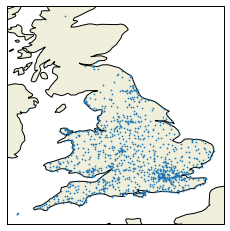

In [24]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.scatter(list(dict(fplotdata).values()),list(dict(fplotdata).keys()),s=0.5, zorder=10)

#plt.show()

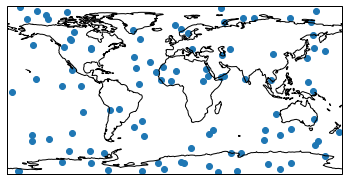

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(x, y)

lon = x
lat = y

NameError: name 'lon' is not defined

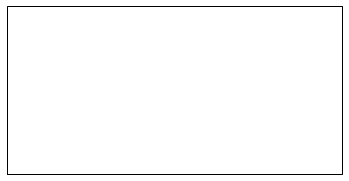

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
